In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nltk
from nltk.tokenize import word_tokenize

In [4]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('eval_data.csv')
train.rename(columns={'can u do check in for me': 'Questions'}, inplace=True)
train.head()

,Questions
0,score ke update nai milre apke
1,i need a hotel near symbiosis college
2,i have trying this app for first time
3,your app have some bugs
4,any nearest atm


In [5]:
train['word_count'] = train['Questions'].apply(lambda x: len(str(x).split(" ")))
test['word_count'] = test['Message'].apply(lambda x: len(str(x).split(" ")))

In [6]:
sents =train['Questions']
sents_1=test['Message']

In [8]:
train[['Questions','word_count']].head()

,Questions,word_count
0,score ke update nai milre apke,6
1,i need a hotel near symbiosis college,7
2,i have trying this app for first time,8
3,your app have some bugs,5
4,any nearest atm,3


In [9]:
train['char_count'] = train['Questions'].str.len() ## this also includes spaces
train[['Questions','char_count']].head()

,Questions,char_count
0,score ke update nai milre apke,30
1,i need a hotel near symbiosis college,37
2,i have trying this app for first time,37
3,your app have some bugs,23
4,any nearest atm,15


In [10]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['Questions'].apply(lambda x: avg_word(x))
train[['Questions','avg_word']].head()

,Questions,avg_word
0,score ke update nai milre apke,4.166667
1,i need a hotel near symbiosis college,4.428571
2,i have trying this app for first time,3.750000
3,your app have some bugs,3.800000
4,any nearest atm,4.333333


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['Questions'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Questions','stopwords']].head()

,Questions,stopwords
0,score ke update nai milre apke,0
1,i need a hotel near symbiosis college,2
2,i have trying this app for first time,4
3,your app have some bugs,3
4,any nearest atm,1


In [12]:
train['numerics'] = train['Questions'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Questions','numerics']].tail()

,Questions,numerics
55396,i want to pay my bike insurance,0
55397,i want flour,0
55398,where can i buy case for htc desire 700,1
55399,what are the benefit provided by company to yo...,0
55400,what if i asked u a very serious question?pers...,0


In [13]:
train['Questions'] = train['Questions'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Questions'].head()
test['Message'] = test['Message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['Message'].head()

0                                 i want to buy mobile
1                         hey i want to buy headphones
2           can you please guide me about share market
3    then tell me the best and safest way to root m...
4                                    camera nt working
Name: Message, dtype: object

In [14]:
# """The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 
# Therefore removing all instances of it will help us reduce the size of the training data."""
train['Questions'] = train['Questions'].str.replace('[^\w\s]','')
train['Questions'].head()
test['Message'] = test['Message'].str.replace('[^\w\s]','')
test['Message'].head()

0                                 i want to buy mobile
1                         hey i want to buy headphones
2           can you please guide me about share market
3    then tell me the best and safest way to root m...
4                                    camera nt working
Name: Message, dtype: object

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Questions'] = train['Questions'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Questions'].head()
test['Message'] = test['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['Message'].head()

0                    want buy mobile
1            hey want buy headphones
2          please guide share market
3    tell best safest way root phone
4                  camera nt working
Name: Message, dtype: object

In [16]:
#After removing stops words
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['Questions'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Questions','stopwords']].head()
test['stopwords'] = test['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
test[['Message','stopwords']].head()

,Message,stopwords
0,want buy mobile,0
1,hey want buy headphones,0
2,please guide share market,0
3,tell best safest way root phone,0
4,camera nt working,0


In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

tokens = word_tokenize(''.join(train['Questions']))
nltk.pos_tag(tokens)

[('score', 'NN'),
 ('ke', 'NN'),
 ('update', 'JJ'),
 ('nai', 'JJ'),
 ('milre', 'NNS'),
 ('apkeneed', 'VBP'),
 ('hotel', 'NN'),
 ('near', 'IN'),
 ('symbiosis', 'NN'),
 ('collegetrying', 'VBG'),
 ('app', 'NNS'),
 ('first', 'RB'),
 ('timeapp', 'VBP'),
 ('bugsnearest', 'JJS'),
 ('atmus', 'NN'),
 ('tripnearest', 'NN'),
 ('rapair', 'NN'),
 ('services', 'NNS'),
 ('carsstill', 'VBP'),
 ('invalid', 'JJ'),
 ('says_date_', 'NN'),
 ('match', 'NN'),
 ('updatehi', 'JJ'),
 ('im', 'NN'),
 ('interested', 'JJ'),
 ('watching', 'VBG'),
 ('running', 'VBG'),
 ('shaadi', 'NN'),
 ('movie_namerunning', 'VBG'),
 ('shaaditasktrainhosurwakewishwant', 'NN'),
 ('know', 'VBP'),
 ('nearest', 'JJS'),
 ('pizza', 'NN'),
 ('locationlike', 'NN'),
 ('malad', 'NN'),
 ('goregaon', 'NN'),
 ('etcdelete', 'JJ'),
 ('itemr', 'NN'),
 ('batsmengood', 'NN'),
 ('eveningwant', 'NN'),
 ('go', 'VBP'),
 ('mumbai', 'RBS'),
 ('darshanwant', 'JJ'),
 ('punjab', 'NN'),
 ('bank', 'NN'),
 ('atmping', 'VBG'),
 ('_numeral_', 'JJ'),
 ('mins', 'NNS

In [18]:
# Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words 
# from our text data First, 
# let’s check the 5 most frequently occurring words in our text data then take call to remove or retain.
freq = pd.Series(' '.join(train['Questions']).split()).value_counts()[:10]
freq
freq = pd.Series(' '.join(test['Message']).split()).value_counts()[:10]
freq

want        139
u           110
please       73
need         69
help         62
tell         52
get          52
reminder     43
know         41
buy          41
dtype: int64

In [19]:
##removing of first five frequently occured word


In [20]:
freq = list(freq)
train['Questions'] = train['Questions'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Questions'].head()
freq = list(freq)
test['Message'] = test['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test['Message'].head()

0                    want buy mobile
1            hey want buy headphones
2          please guide share market
3    tell best safest way root phone
4                  camera nt working
Name: Message, dtype: object

In [21]:
#checking of first 10 rarely used words
freq = pd.Series(' '.join(train['Questions']).split()).value_counts()[-10:]
freq
freq = pd.Series(' '.join(test['Message']).split()).value_counts()[-10:]
freq

crownit        1
0115           1
ansari         1
99             1
laptops        1
connection     1
docomohubli    1
music          1
jiso           1
bombay         1
dtype: int64

In [22]:
#removing of those words which are rarely used
freq = list(freq)
train['Questions'] = train['Questions'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Questions'].head()
freq = list(freq)
test['Message'] = test['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test['Message'].head()

0                    want buy mobile
1            hey want buy headphones
2          please guide share market
3    tell best safest way root phone
4                  camera nt working
Name: Message, dtype: object

In [23]:
# from nltk.stem.lancaster import LancasterStemmer
# lancaster_stemmer = LancasterStemmer()
# train['can u do check in for me']=lancaster_stemmer.stem(train['can u do check in for me']) 

In [24]:
from nltk.stem.lancaster import LancasterStemmer
st =  LancasterStemmer()
train['Questions'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
from nltk.stem.lancaster import LancasterStemmer
st =  LancasterStemmer()
test['Message'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                    want buy mobl
1            hey want buy headphon
2           pleas guid shar market
3    tel best safest way root phon
4                    camer nt work
Name: Message, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_test= le.fit_transform(test['Outlier?'])

(-0.5, 399.5, 199.5, -0.5)

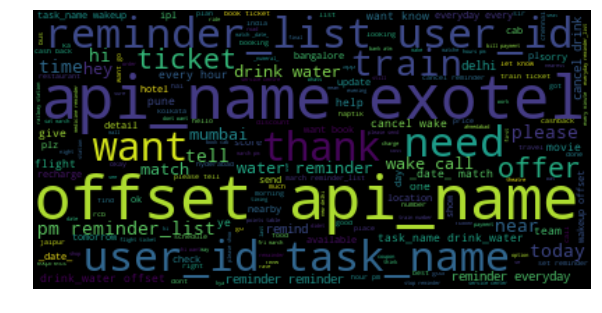

In [27]:
textall = " ".join(sents)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer()
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [24]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000000000CC7FB70>>,
        use_idf=True, vocabulary=None)

In [25]:
train_vect=vect.fit(train['Questions'])
train_vect
test_vect=vect.fit(test['Message'])
test_vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000000000CC7FB70>>,
        use_idf=True, vocabulary=None)

In [26]:
train_vect.get_feature_names()[:50]
test_vect.get_feature_names()[:50]

['0',
 '0 api_name',
 '03',
 '03 march',
 '04',
 '04 march',
 '05',
 '05 march',
 '0555',
 '06',
 '06 march',
 '0700',
 '08',
 '0800',
 '0800 reminder_list',
 '1',
 '1 hour',
 '10',
 '100',
 '1000',
 '1000 800',
 '1030',
 '11',
 '12',
 '12301899',
 '15',
 '2',
 '2 hours',
 '20',
 '2017',
 '21',
 '21st',
 '25th',
 '26',
 '3',
 '30',
 '30 minutes',
 '3rd',
 '3rd sem',
 '3s',
 '4',
 '400',
 '45',
 '4g',
 '5',
 '5 photo',
 '5 pics',
 '50',
 '6',
 '6 iphone']

In [46]:

train_vectors = train_vect.transform(train['Questions'])
train_vectors
test_vectors = test_vect.transform(test['Message'])
test_vectors

<1627x1153 sparse matrix of type '<class 'numpy.float64'>'
	with 5612 stored elements in Compressed Sparse Row format>

In [57]:
X=train_vectors[0:1627]
X

<1627x1153 sparse matrix of type '<class 'numpy.float64'>'
	with 4731 stored elements in Compressed Sparse Row format>

In [51]:
### Elbow point to find best value of number of cluster for raw data
###in the output you can see the value of k=2 is low so it is the best value for us
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.06528426169449439
For n_clusters=3, The Silhouette Coefficient is 0.06847097932250303
For n_clusters=4, The Silhouette Coefficient is 0.0716124636863244
For n_clusters=5, The Silhouette Coefficient is 0.07570145072983513
For n_clusters=6, The Silhouette Coefficient is 0.0748755212451181
For n_clusters=7, The Silhouette Coefficient is 0.07363372774818833
For n_clusters=8, The Silhouette Coefficient is 0.07962964233555284
For n_clusters=9, The Silhouette Coefficient is 0.08752071194259589
For n_clusters=10, The Silhouette Coefficient is 0.08867209717671946


In [49]:
##Elbow point to find best value of number of cluster for test data
###in the output you can see the value of k=2 is low so it is the best value for us
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(test_vectors)
    label = kmeans.labels_
    sil_coeff = silhouette_score(test_vectors, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.03928394158408508
For n_clusters=3, The Silhouette Coefficient is 0.04028162975329743
For n_clusters=4, The Silhouette Coefficient is 0.04143415487827994
For n_clusters=5, The Silhouette Coefficient is 0.0433647578706595
For n_clusters=6, The Silhouette Coefficient is 0.04633004832020985
For n_clusters=7, The Silhouette Coefficient is 0.04410772505798043
For n_clusters=8, The Silhouette Coefficient is 0.047214639806830286
For n_clusters=9, The Silhouette Coefficient is 0.045470149894111155
For n_clusters=10, The Silhouette Coefficient is 0.04953752240327438


In [42]:
# import pandas as pd
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt





# sse = {}
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(test_vectors[0:600])
    
#     #print(data["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
#plt.show()

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init ='k-means++', max_iter = 100, n_init= 10, random_state=0)
km.fit(train_vectors,test_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [54]:
print("Cluster centers are:", km.cluster_centers_)
print('='*20)
print("Within cluster sum of squares is:", km.inertia_)

Cluster centers are: [[0.00412461 0.00404096 0.00062981 ... 0.00534583 0.00015301 0.00088651]
 [0.         0.         0.         ... 0.00669552 0.00022596 0.        ]]
Within cluster sum of squares is: 46154.77505634137


In [58]:
y_kmeans_pred = km.predict(X)
list(y_kmeans_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
# y_kmeans[827:1600]
# count = y_kmeans.count(1)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
cf = confusion_matrix(y_test,y_kmeans_pred)
print(cf)
acc = accuracy_score(y_test,y_kmeans_pred)
print(acc)
precision = precision_score(y_test,y_kmeans_pred)
print(precision)
recall = recall_score(y_test,y_kmeans_pred)
print(recall)
f_score = f1_score(y_test,y_kmeans_pred)
print(f_score)

[[757  44]
 [789  37]]
0.4880147510755993
0.4567901234567901
0.044794188861985475
0.08158765159867697


In [129]:
train_vectors.shape

(55401, 1153)

In [64]:
from gensim import corpora, models
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

ModuleNotFoundError: No module named 'gensim'

In [130]:
nltk.download('wordcloud')

[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


False